In [1]:
#importing libraries

import pandas as pd
import numpy as np

from scipy.stats import skew
from scipy.stats import kurtosis
import statistics

import plotly.graph_objects as go

from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import matplotlib.font_manager

In [2]:
dataset = pd.read_csv("final_dataset.csv")

In [3]:
# dataset = dataset[dataset['labels'] == 1]

In [4]:
dataset

,created_at,entry_id,Ambient Temp (degC),Humidity (%),Soil Moisture (%),Capacitor Voltage (mV),Soil Temperature (degC),SACP Cell Current (mA),Soil Voltage (V),Cell Power (mW),year,month,day,labels
0,2020-06-18 23:29:49,1,20.6875,47.49635,99,2907.74194,22.5000,25.9,0.2946,8,2020,6,18,1
1,2020-06-18 23:30:58,2,20.6250,47.52944,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,1
2,2020-06-18 23:32:06,3,20.6250,47.55913,99,2909.03223,22.5000,26.0,0.2946,8,2020,6,18,1
3,2020-06-18 23:33:15,4,20.5625,47.59531,99,2912.90332,22.5000,26.0,0.2946,8,2020,6,18,1
4,2020-06-18 23:34:23,5,20.4375,47.60892,99,2911.61279,22.4375,26.0,0.2946,8,2020,6,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375198,2021-07-26 19:11:20,380357,26.1250,88.10663,100,2925.48389,24.9375,16.4,1.6400,0,2021,7,26,0
375199,2021-07-26 19:12:30,380358,26.0625,88.35374,100,2874.19360,24.9375,16.4,1.6400,0,2021,7,26,0
375200,2021-07-26 19:13:40,380359,26.0625,88.63950,100,2889.67749,24.9375,16.4,1.6400,0,2021,7,26,0
375201,2021-07-26 19:14:49,380360,25.9375,88.89094,100,3067.41943,24.8750,16.3,1.6300,0,2021,7,26,0


In [5]:
dataset_2020 = dataset.loc[(dataset['month'] <= 12) & (dataset['year'] == 2020)]
dataset_2021 = dataset.loc[(dataset['month'] <= 12) & (dataset['year'] == 2021)]
dataset_june_2020 = dataset.loc[(dataset['month'] == 6) & (dataset['year'] == 2020)]
dataset_july_2020 = dataset.loc[(dataset['month'] == 7) & (dataset['year'] == 2020)]
dataset_aug_2020 = dataset.loc[(dataset['month'] == 8) & (dataset['year'] == 2020)]
dataset_sept_2020 = dataset.loc[(dataset['month'] == 9) & (dataset['year'] == 2020)]
dataset_oct_2020 = dataset.loc[(dataset['month'] == 10) & (dataset['year'] == 2020)]
dataset_nov_2020 = dataset.loc[(dataset['month'] == 11) & (dataset['year'] == 2020)]
dataset_dec_2020 = dataset.loc[(dataset['month'] == 12) & (dataset['year'] == 2020)]

dataset_jan_2021 = dataset.loc[(dataset['month'] == 1) & (dataset['year'] == 2021)]
dataset_feb_2021 = dataset.loc[(dataset['month'] == 2) & (dataset['year'] == 2021)]
dataset_mar_2021 = dataset.loc[(dataset['month'] == 3) & (dataset['year'] == 2021)]
dataset_apr_2021 = dataset.loc[(dataset['month'] == 4) & (dataset['year'] == 2021)]
dataset_may_2021 = dataset.loc[(dataset['month'] == 5) & (dataset['year'] == 2021)]
dataset_june_2021 = dataset.loc[(dataset['month'] == 6) & (dataset['year'] == 2021)]
dataset_july_2021 = dataset.loc[(dataset['month'] == 7) & (dataset['year'] == 2021)]
dataset_aug_2021 = dataset.loc[(dataset['month'] == 8) & (dataset['year'] == 2021)]

In [6]:
# connect = [dataset_june_2020, dataset_july_2020, dataset_aug_2020, dataset_nov_2020, dataset_dec_2020]
# corrected_data_merge = pd.concat(connect)

In [7]:
df1 = dataset_2021.iloc[:, [7]]
X_train = np.array(df1)

In [8]:
X_train.shape

(160205, 1)

In [9]:
nu_matrix = [8e-07 ,5e-07, 2e-07, 1e-07, 9e-06, 7.5e-06, 5e-05, 2e-05, 7.5e-05, 1e-04, 2e-04, 5e-04, 7.5e-04]

for value in nu_matrix:
    model = OneClassSVM(nu = value, gamma = 'scale')
    model.fit(X_train)
    ocsvm_labels = model.predict(X_train)
    ocsvm_labels = ocsvm_labels.reshape(X_train.shape[0],1)
    cr = np.array(dataset_2021['created_at']).reshape(X_train.shape[0],1)
    final_array = np.concatenate((cr, X_train, ocsvm_labels), axis = 1)
    final_output = pd.DataFrame(final_array, columns = ['created_at', 'SACP Cell Current (mA)', 'Labels'])
    print(f"for {value} the number of labels are divided as: {final_output['Labels'].value_counts()}")

for 8e-07 the number of labels are divided as: -1    95170
 1    65035
Name: Labels, dtype: int64
for 5e-07 the number of labels are divided as:  1    137848
-1     22357
Name: Labels, dtype: int64
for 2e-07 the number of labels are divided as:  1    118774
-1     41431
Name: Labels, dtype: int64
for 1e-07 the number of labels are divided as:  1    99431
-1    60774
Name: Labels, dtype: int64
for 9e-06 the number of labels are divided as:  1    147407
-1     12798
Name: Labels, dtype: int64
for 7.5e-06 the number of labels are divided as:  1    139995
-1     20210
Name: Labels, dtype: int64
for 5e-05 the number of labels are divided as:  1    148381
-1     11824
Name: Labels, dtype: int64
for 2e-05 the number of labels are divided as:  1    142257
-1     17948
Name: Labels, dtype: int64
for 7.5e-05 the number of labels are divided as:  1    154328
-1      5877
Name: Labels, dtype: int64
for 0.0001 the number of labels are divided as:  1    152813
-1      7392
Name: Labels, dtype: int64

In [30]:
model_2 = OneClassSVM(nu = 1e-04, gamma = 'scale')
model_2.fit(X_train)
ocsvm_labels_2 = model_2.predict(X_train)
ocsvm_labels_2 = ocsvm_labels_2.reshape(X_train.shape[0],1)
cr_2 = np.array(dataset_2021['created_at']).reshape(X_train.shape[0],1)
final_array = np.concatenate((cr_2, X_train, ocsvm_labels_2), axis = 1)
final_output = pd.DataFrame(final_array, columns = ['created_at', 'SACP Cell Current (mA)', 'Labels'])

In [31]:
print(f"for nu = 0.01 the number of labels are divided as: {final_output['Labels'].value_counts()}")

for nu = 0.01 the number of labels are divided as:  1    152813
-1      7392
Name: Labels, dtype: int64


In [32]:
final_output

,created_at,SACP Cell Current (mA),Labels
0,2021-01-01 00:00:43,16.9,1
1,2021-01-01 00:01:52,16.9,1
2,2021-01-01 00:03:01,16.9,1
3,2021-01-01 00:04:11,16.9,1
4,2021-01-01 00:05:20,16.9,1
...,...,...,...
160200,2021-07-26 19:11:20,16.4,1
160201,2021-07-26 19:12:30,16.4,1
160202,2021-07-26 19:13:40,16.4,1
160203,2021-07-26 19:14:49,16.3,1


<AxesSubplot:ylabel='SACP Cell Current (mA)'>

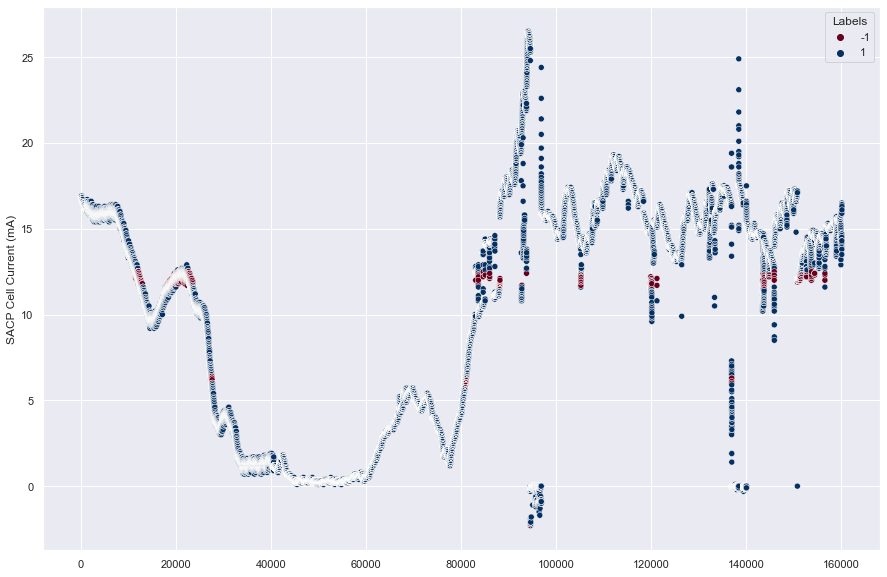

In [33]:
fig = plt.figure(figsize=(15,10))
import seaborn as sns
sns.set()
sns.scatterplot(x = final_output.index , y = final_output['SACP Cell Current (mA)'], hue = final_output['Labels'], palette = 'RdBu')